In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [41]:
sell = pd.read_excel('../data/Hackathon Data.xlsx')

In [42]:
sell.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,?,?,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,?,498,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,7


In [44]:
#The total num of unique Subclass
n_subclass = len(sell.SUBCLASS_NAME.unique())
n_class = len(sell.CLASS_NAME.unique())
n_ml = len(sell.ML_NAME.unique())
n_category = len(sell.CATEGORY_NAME.unique())
print('number of category: ', n_category,'\n',
     'number of ml: ', n_ml,'\n',
     'number of class: ', n_class,'\n',
     'number of subclass: ', n_subclass,'\n',)

number of category:  3 
 number of ml:  8 
 number of class:  25 
 number of subclass:  116 



In [63]:
# Distribution of items within class
sub_dis = sell.groupby(by=['CLASS_NAME'], as_index= False\
                      ).agg({'Encoded_SKU_ID': lambda x: x.nunique(),\
                             'DAILY_UNITS':np.mean,\
                            'RETAIL_PRICE':np.median})
sub_dis

,CLASS_NAME,Encoded_SKU_ID,DAILY_UNITS,RETAIL_PRICE
0,BUILT IN COOKING,30,1.905268,1949.99
1,BUILT-IN REFRIGERATR,2,1.993223,839.99
2,CAMERAS - ILC,8,5.050014,2299.99
3,CAMERAS - P&S,9,35.823519,329.99
4,CAR ELECTRONICS,19,8.339082,59.99
5,CAR STEREO,28,6.273819,149.99
6,DIGITAL CAMCORDERS,6,5.658148,849.99
7,DIGITAL CAMERA ACCY,116,12.529123,44.99
8,DISHWASHERS,9,6.444624,849.99
9,DRONES,1,33.864903,79.99


In [58]:
sub_dis.sort_values('Encoded_SKU_ID', ascending = False, inplace = True)

In [61]:
sub_dis['Encoded_SKU_ID'].corr(sub_dis['DAILY_UNITS'])

-0.06998731488768914

In [64]:
sub_dis['Encoded_SKU_ID'].corr(sub_dis['RETAIL_PRICE'])

-0.18674374383750256

<AxesSubplot: xlabel='CLASS_NAME'>

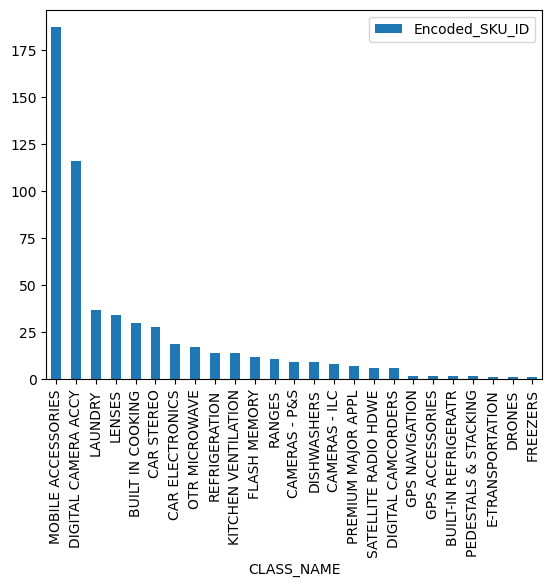

In [56]:
sub_dis.plot(x='CLASS_NAME',y='Encoded_SKU_ID',kind='bar')

<AxesSubplot: xlabel='CLASS_NAME'>

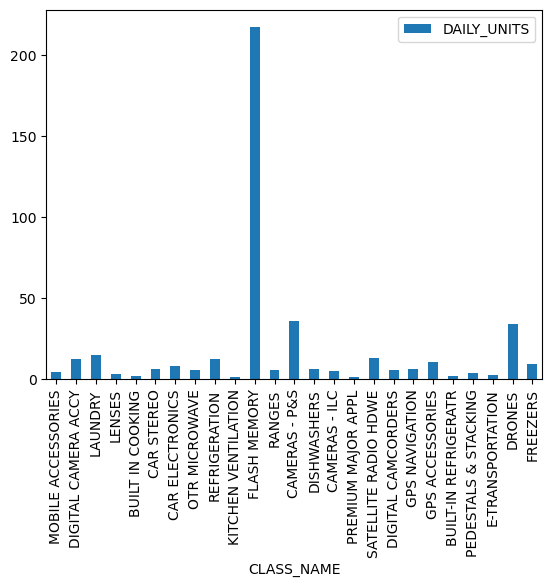

In [57]:
sub_dis.plot(x='CLASS_NAME',y='DAILY_UNITS',kind='bar')

<AxesSubplot: xlabel='subclass'>

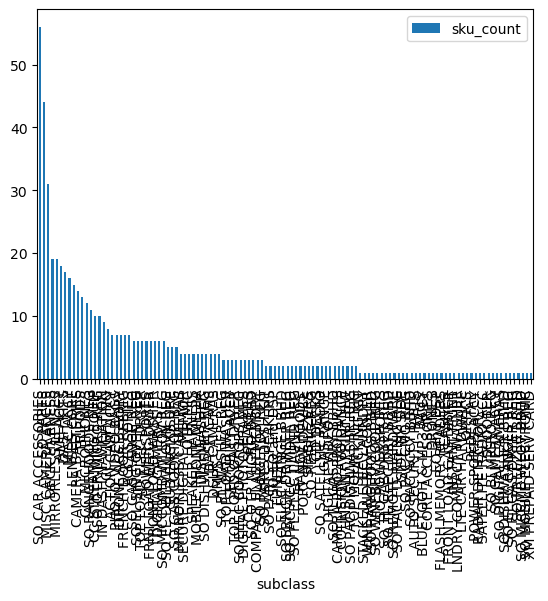

In [37]:
# distribution of SKU within subclasses
subclass_dis = sell.groupby(by=['SUBCLASS_NAME'], as_index= False)['Encoded_SKU_ID'].nunique()
subclass_dis.rename(columns= {'SUBCLASS_NAME':'subclass','Encoded_SKU_ID':'sku_count'}, inplace = True)
subclass_dis.sort_values('sku_count', ascending = False, inplace = True)
subclass_dis.plot(x='subclass',kind='bar')